# **Índice**

>[Índice](#scrollTo=1VjhGjeOqDRX)

>[Instalación de librerias faltantes](#scrollTo=LYrM-MmlqMOH)

>[Importación de librerías](#scrollTo=GZLRT2kpqQnh)

>[Carga de datos](#scrollTo=EPCvqP8IqVkA)

>[Carga de codificaciones](#scrollTo=5L0lOcGZyaXR)

>[Análisis](#scrollTo=KxowzAe-wOuE)

>>[Parte 1: Evaluando impacto de las variables categóricas en el desempeño](#scrollTo=MytVzJPj0GAy)

>>>[Funciones auxiliares](#scrollTo=IMHzyE9lnoJa)

>>>[Creación de una variable categórica de desempeño general](#scrollTo=l7u8MNnq0LtJ)

>>>[Región (SUBNATIO) vs Desempeño General (OVERALL_PERF)](#scrollTo=58db6R597gdg)

>>>[Región (SUBNATIO) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=aa4AcmQL9Yrz)

>>>[Género (GENDER) vs Desempeño General (OVERALL_PERF)](#scrollTo=AsOLxr5B-M_-)

>>>[Género (GENDER) VS Notas en Materias (MATH, READ, SCIE`)](#scrollTo=7LbSjcZBs-S8)

>>>[Status inmigratorio (IMMIG) vs Desempeño General (OVERALL_PERF)](#scrollTo=mTO469LpHtbL)

>>>[Repitencia (REPEAT) vs Desempeño General (OVERALL_PERF)](#scrollTo=SaRFxa_9iTs2)

>>>[Repitencia (REPEAT) vs Notas en Materias (MATH, READ, SCIE`)](#scrollTo=2yWAuqlIvr5M)

>>>[Tipo de escuela (PRIVATESCH) vs Desempeño General (OVERALL_PERF)](#scrollTo=KZa_9FwylEU7)

>>>[Tipo de escuela (PRIVATESCH) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=4CHBJjGSwquE)

>>>[Propietario de escuela (SCHLTYPE) vs Desempeño General (OVERALL_PERF)](#scrollTo=6NYQW0lJvFoX)

>>>[Propietario de escuela (SCHLTYPE) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=APoIxmzkw5qK)

>>[Parte 2: Evaluando impacto de las variables contInuas en las notas](#scrollTo=xezuxb69xoLJ)

>>>[Funciones auxiliares](#scrollTo=-c0BpvhDST_B)

>>>[Edad (AGE) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=qN_hzjv2R1kZ)

>>>[Nivel educativo de los padres (PARED) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=quVrjNjmZ2ns)

>>>[Nivel de ocupación de los padres (HISEI) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=zQEEUAy1Z3uZ)

>>>[Duración de la educación y atención durante la infancia (DURECEC) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=RL5BXEZMZ4Qp)

>>>[Status ecónomico, social y cultural (ESCS) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=ZjmAIdGSZ4x6)

>>>[Posesiones culturales (CULTPOSS) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=ABp0oYECZ5Mp)

>>>[Clima disciplinario (DISCLIMA) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=26uMOGZ5Z5tQ)

>>>[Percepción de competitivad (PERCOMP) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=18gZe8dgZ6T-)

>>>[Proporción Alumno-Profesor (STRATIO) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=oKJTPsaDZ60g)

>>>[Tamaño de la escuela (SCHSIZE) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=py4QRd3NZ7V-)

>>>[Computadoras disponibles por alumnso (RATCMP1) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=4dWt8u_YZ8BO)

>>>[Número total de profesores en la escuela (TOTAT) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=ec07KH98Z8l8)

>>>[Proporción de profesores certificados (PROATCE) vs Notas en Materias (MATH, READ, SCIE)](#scrollTo=JtblEr9RZ9Eb)



# **Instalación de librerias faltantes**

In [1]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00


# **Importación de librerías**

In [2]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, shapiro
from linearmodels.iv import IV2SLS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import reset_ramsey, variance_inflation_factor
from tabulate import tabulate

# **Carga de datos**

In [3]:
file_id = "1-2rjBgeoVG6G1ysY_dEWk8fGisE2_V44"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url=url, output="pisa.csv", quiet=False)
df = pd.read_csv("pisa.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1-2rjBgeoVG6G1ysY_dEWk8fGisE2_V44
From (redirected): https://drive.google.com/uc?id=1-2rjBgeoVG6G1ysY_dEWk8fGisE2_V44&confirm=t&uuid=2a2be521-814d-4a95-8336-b0b4fd9b3f60
To: /content/pisa.csv
100%|██████████| 179M/179M [00:01<00:00, 94.7MB/s]


In [4]:
try:
    df.drop(columns=['Unnamed: 0'], inplace=True)
except:
    print("La columna 'Unnamed: 0' ya fue eliminada.")

# **Carga de codificaciones**


In [5]:
# Codificaciones de alumnos
file_id = "1-2OJKrrVvE2PQ4xIIWe63hWuhBA-XUC2"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url=url, output="codificacion_alumnos.csv", quiet=False)
stu_encoding = pd.read_csv("codificacion_alumnos.csv")

Downloading...
From: https://drive.google.com/uc?id=1-2OJKrrVvE2PQ4xIIWe63hWuhBA-XUC2
To: /content/codificacion_alumnos.csv
100%|██████████| 25.6k/25.6k [00:00<00:00, 37.1MB/s]


In [6]:
try:
    stu_encoding.drop(columns=['Unnamed: 0'], inplace=True)
except:
    print("La columna 'Unnamed: 0' ya fue eliminada.")

In [7]:
# Codificaciones de alumnos
file_id = "1--vxX46klBFjxovIq0NSbopr8cIcV5Pf"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url=url, output="codificacion_escuelas.csv", quiet=False)
sch_encoding = pd.read_csv("codificacion_escuelas.csv")

Downloading...
From: https://drive.google.com/uc?id=1--vxX46klBFjxovIq0NSbopr8cIcV5Pf
To: /content/codificacion_escuelas.csv
100%|██████████| 12.0k/12.0k [00:00<00:00, 34.1MB/s]


In [8]:
try:
    sch_encoding.drop(columns=['Unnamed: 0'], inplace=True)
except:
    print("La columna 'Unnamed: 0' ya fue eliminada.")

# **Análisis**


El objetivo es identificar **variables que influyan en el desempeño de los alumnos**. Se realizarán pruebas estadísticas y observaciones gráficas de diversas variables cuyas características probablemente influyan en la nota de los estudiantes en las diversas temáticas.

In [9]:
df_analysis = df.copy()

Paso 1: identificar las variables de interés, separarlas en categóricas o continuas.

Recordemos entonces primero qué signfica cada variable.

In [10]:
vars_info = pd.concat([stu_encoding, sch_encoding])
vars_info = vars_info[['NAME', 'VARLABEL', 'TYPE', 'MINMAX']].drop_duplicates(ignore_index=True)
vars_info

,NAME,VARLABEL,TYPE,MINMAX
0,CNTSCHID,Intl. School ID,NUM,800002-98300806
1,CNTSTUID,Intl. Student ID,NUM,800001-98329122
2,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...,CHAR,800001-98329122
3,GENDER,Student (Standardized) Gender,NUM,1-2
4,AGE,Age,NUM,15.08-16.33
5,PARED,Index highest parental education in years of s...,NUM,3-18
6,HISEI,Index highest parental occupational status,NUM,11.01-88.96
7,IMMIG,Index Immigration status,NUM,1-3
8,DURECEC,Duration in early childhood education and care,NUM,0-8
9,REPEAT,Grade Repetition,NUM,0-1


Separamos las que nosotros creemos que son de mayor interés (inicialmente) en categóricas y continuas:

In [11]:
ids = ['CNTSCHID', 'CNTSTUID']

# Categóricas y continuas de alumnos
categorical_stu = ['SUBNATIO', 'GENDER', 'IMMIG', 'REPEAT']
continuous_stu = ['AGE', 'PARED', 'HISEI', 'DURECEC', 'ESCS', 'CULTPOSS', 'DISCLIMA', 'PERCOMP', 'EMOSUPS']

# Categóricas y continuas de escuelas
categorical_sch = ['PRIVATESCH', 'SCHLTYPE']
continuous_sch = ['STRATIO', 'SCHSIZE', 'RATCMP1', 'TOTAT', 'PROATCE']

# Variables objetivo
target = ['MATH', 'READ', 'SCIE']

keep = ids + categorical_stu + categorical_sch + continuous_stu + continuous_sch + target

In [12]:
df_analysis = df_analysis[keep]

In [13]:
# Por ahora, las que excluimos son:
excluded = vars_info[~vars_info['NAME'].isin(keep)]
excluded.reset_index(drop=True)

,NAME,VARLABEL,TYPE,MINMAX
0,BEINGBULLIED,Student's experience of being bullied (WLE),NUM,-0.7823-3.8591
1,RATCMP2,Proportion of available computers that are con...,NUM,0-1
2,PROAT5AB,Index proportion of all teachers ISCED LEVEL 5...,NUM,0-1
3,PROAT5AM,Index proportion of all teachers ISCED LEVEL 5...,NUM,0-1
4,PROAT6,Index proportion of all teachers ISCED LEVEL 6,NUM,0-1
5,CLSIZE,Class Size,NUM,13-53
6,CREACTIV,Creative extra-curricular activities (Sum),NUM,0-3
7,EDUSHORT,Shortage of educational material (WLE),NUM,-1.9319-3.5229
8,STAFFSHORT,Shortage of educational staff (WLE),NUM,-2.5891-4.1125
9,STUBEHA,Student behaviour hindering learning (WLE),NUM,-4.3542-3.6274


## **Parte 1: Evaluando impacto de las variables categóricas en el desempeño**


El desempeño de un alumno en matemática está dado por la columna `MATH`, en lengua por la columna `READ` y en ciencia por la columna `SCIE`.

### **Funciones auxiliares**

In [14]:
def chi2_test_and_conclusion(table, alpha: float):
    # Cálculo de las frecuencias esperadas
    chi2, p, dof, expected = stats.chi2_contingency(table)

    # 'expected' es una matriz de frecuencias esperadas calculadas bajo la hipótesis
    # nula de independencia
    expected_df = pd.DataFrame(
        expected, index=table.index, columns=table.columns
    )

    chi2_critico = stats.chi2.ppf(1 - alpha, dof)

    print("\nFrecuencias Esperadas:")
    print(tabulate(expected_df, headers=expected_df.columns, tablefmt="fancy_grid"))

    print(f"\nEstadístico chi-cuadrado: {chi2:.2f}")
    print(f"Grados de libertad: {dof}")
    print(f"Valor p: {p:.4f}")
    print(f"\nValor crítico chi-cuadrado (α = {alpha}): {chi2_critico:.2f}")

    rechazar_H0 = chi2 > chi2_critico # Criterio Lateral Derecha.
    if rechazar_H0:
        conclusion = (
            "Rechazamos la hipótesis nula: hay una relación significativa "
            "entre las variables."
        )
    else:
        conclusion = (
            "No rechazamos la hipótesis nula: no hay evidencia suficiente "
            "para afirmar que hay una relación entre las variables."
        )
    print(f"Conclusión: {conclusion}")

def bar_plots_for_var_values(
    table, labels: list[str], values: list[str], colors: list[str], x_label: str, y_label:str
):
    fig, axes = plt.subplots(nrows=len(values), ncols=1, figsize=(5, 9))

    for i, value in enumerate(values):
        table[value].plot(kind='bar', ax=axes[i], color=colors[i])
        axes[i].set_title(value)
        axes[i].set_xticklabels(labels, rotation=0)
        axes[i].set_xlabel(x_label)
        axes[i].set_ylabel(y_label)

    fig.tight_layout()
    fig.show()

def mean_difference_test_and_conclusion(group_a, group_b, values, index, alpha=0.05):
    for value in values:
        print(f"Diferencia de medias con respecto a {index} en {value}")

        # Realiza el test t de Student
        t_stat, p_value = ttest_ind(group_a[value], group_b[value], equal_var=False)

        print(f"Estadístico t: {t_stat}")
        print(f"Valor p: {p_value}")

        if p_value < alpha:
            print(
                "\nRechazamos la hipótesis nula. Las medias son "
                "significativamente diferentes."
            )
        else:
            print(
                "\nNo podemos rechazar la hipótesis nula. No hay evidencia "
                "suficiente para afirmar que las medias son diferentes."
            )
        print("---------------------------------------------------------------------")

### **Creación de una variable categórica de desempeño general**

Creamos una nueva variable llamada `OVERALL_PERF` que representará el "desempeño general" de un alumno, medido como la cantidad de materias "aprobadas", donde nuestro criterio de aprobación será tener una nota mayor a un corte dado por la bibliografía sobre PISA.

In [15]:
READ_THRESH = 407
MATH_THRESH = 420
SCIE_THRESH = 409

df_analysis["PASSED_MATH"] = (df_analysis["MATH"] >= MATH_THRESH).astype(int)
df_analysis["PASSED_READ"] = (df_analysis["READ"] >= READ_THRESH).astype(int)
df_analysis["PASSED_SCIE"] = (df_analysis["SCIE"] >= SCIE_THRESH).astype(int)

df_analysis["OVERALL_PERF"] = df_analysis["PASSED_MATH"] + df_analysis["PASSED_READ"] + df_analysis["PASSED_SCIE"]

### **Región (`SUBNATIO`) vs Desempeño General (`OVERALL_PERF`)**

In [16]:
performance_region =  df_analysis.pivot_table(
    values=['CNTSTUID'],
    index='SUBNATIO',
    columns='OVERALL_PERF',
    aggfunc='count',
    fill_value=0
)

In [17]:
grouped = df_analysis.groupby(['SUBNATIO', 'OVERALL_PERF'])['CNTSTUID'].count()
total_subnatio_counts = df_analysis.groupby('SUBNATIO')['CNTSTUID'].count()
percentage = (grouped / total_subnatio_counts) * 100
performance_region = percentage.unstack(fill_value=0)
performance_region = performance_region.round(2)

performance_region

OVERALL_PERF,0,1,2,3
SUBNATIO,,,,
Argentina,54.55,11.97,14.03,19.45
Argentina: Ciudad Autnoma de Buenos,21.86,11.88,12.81,53.46
Argentina: Cordoba,34.72,11.67,16.39,37.23
Argentina: Provincia de Buenos Aires,41.21,13.21,16.74,28.84
Argentina: Tucuman,53.24,12.72,13.30,20.73


Transponemos la tabla para construir gráficos que muestren el desempeño general en cada subregión:

In [18]:
performance_region = performance_region.transpose()
performance_region

SUBNATIO,Argentina,Argentina: Ciudad Autnoma de Buenos,Argentina: Cordoba,Argentina: Provincia de Buenos Aires,Argentina: Tucuman
OVERALL_PERF,,,,,
0,54.55,21.86,34.72,41.21,53.24
1,11.97,11.88,11.67,13.21,12.72
2,14.03,12.81,16.39,16.74,13.30
3,19.45,53.46,37.23,28.84,20.73


Llevamos a cabo una prueba de independencia **Chi cuadrado**

In [19]:
chi2_test_and_conclusion(table=performance_region, alpha=0.05)


Frecuencias Esperadas:
╒════╤═════════════╤═══════════════════════════════════════╤══════════════════════╤════════════════════════════════════════╤══════════════════════╕
│    │   Argentina │   Argentina: Ciudad Autnoma de Buenos │   Argentina: Cordoba │   Argentina: Provincia de Buenos Aires │   Argentina: Tucuman │
╞════╪═════════════╪═══════════════════════════════════════╪══════════════════════╪════════════════════════════════════════╪══════════════════════╡
│  0 │     41.1152 │                               41.1193 │              41.1193 │                                41.1152 │              41.1111 │
├────┼─────────────┼───────────────────────────────────────┼──────────────────────┼────────────────────────────────────────┼──────────────────────┤
│  1 │     12.2898 │                               12.291  │              12.291  │                                12.2898 │              12.2885 │
├────┼─────────────┼───────────────────────────────────────┼──────────────────────┼─────

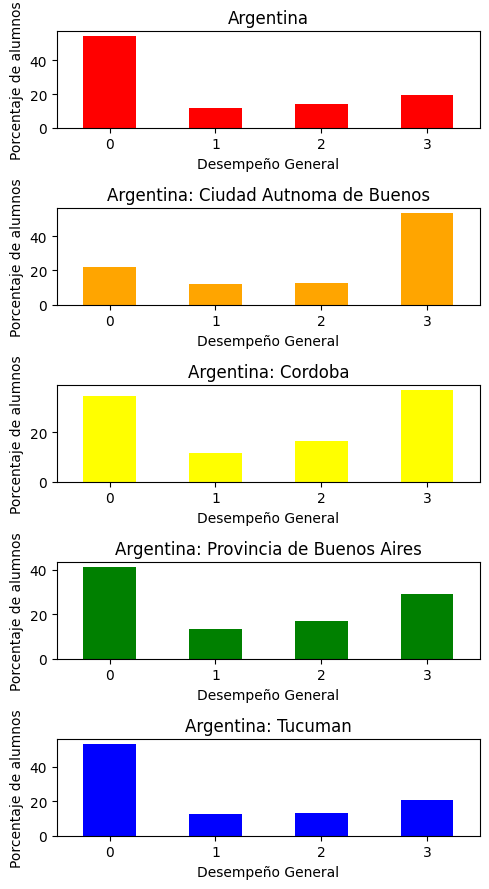

In [20]:
labels = [0, 1, 2, 3]
regions = list(performance_region.columns)
colors = ['red', 'orange', 'yellow', 'green', 'blue']

bar_plots_for_var_values(
    table=performance_region,
    labels=labels,
    values=regions,
    colors=colors,
    x_label='Desempeño General',
    y_label='Porcentaje de alumnos'
)

### **Región (`SUBNATIO`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

In [21]:
grades_per_region = df_analysis.groupby(
    by=['SUBNATIO']
)[['MATH', 'READ', 'SCIE']].mean()

In [22]:
grades_per_region

,MATH,READ,SCIE
SUBNATIO,,,
Argentina,362.955812,381.198848,386.332978
Argentina: Ciudad Autnoma de Buenos,434.647484,454.049250,454.743547
Argentina: Cordoba,400.448386,427.082019,427.360379
Argentina: Provincia de Buenos Aires,387.167165,413.033210,413.372432
Argentina: Tucuman,363.822967,388.542787,390.501842


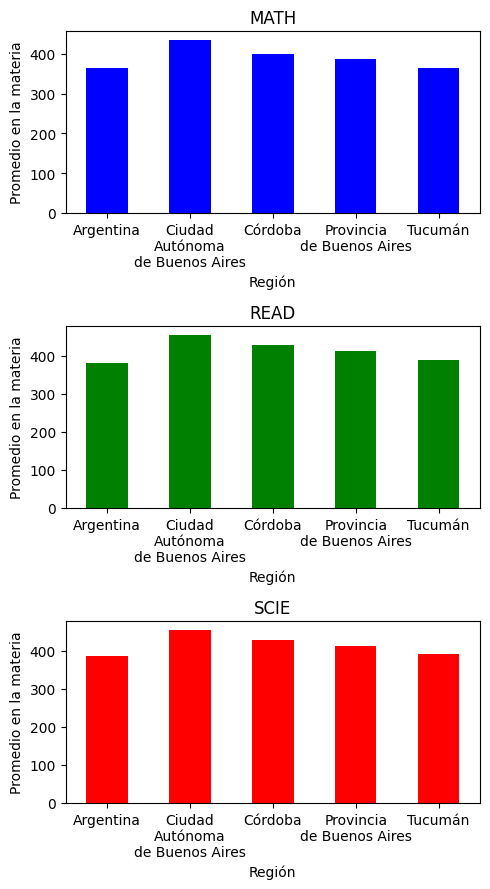

In [23]:
labels = [
    'Argentina',
    'Ciudad\nAutónoma\nde Buenos Aires',
    'Córdoba',
    'Provincia\nde Buenos Aires',
    'Tucumán'
]
subjects = ['MATH', 'READ', 'SCIE']
colors = ['blue', 'green', 'red']

bar_plots_for_var_values(
    table=grades_per_region,
    labels=labels,
    values=subjects,
    colors=colors,
    x_label='Región',
    y_label='Promedio en la materia'
)

### **Género (`GENDER`) vs Desempeño General (`OVERALL_PERF`)**

In [24]:
performance_gender =  df_analysis.pivot_table(
    values=['CNTSTUID'],
    index='GENDER',
    columns='OVERALL_PERF',
    aggfunc='count',
    fill_value=0
)

In [25]:
performance_gender

CNTSTUID                     
OVERALL_PERF        0      1      2      3
GENDER                                    
Female         130936  38244  50073  67965
Male           129140  32154  35577  82161

In [26]:
chi2_test_and_conclusion(table=performance_gender, alpha=0.05)


Frecuencias Esperadas:
╒════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│        │   ('CNTSTUID', 0) │   ('CNTSTUID', 1) │   ('CNTSTUID', 2) │   ('CNTSTUID', 3) │
╞════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ Female │            131918 │           35707.9 │           43444.1 │           76148.1 │
├────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Male   │            128158 │           34690.1 │           42205.9 │           73977.9 │
╘════════╧═══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╛

Estadístico chi-cuadrado: 4217.56
Grados de libertad: 3
Valor p: 0.0000

Valor crítico chi-cuadrado (α = 0.05): 7.81
Conclusión: Rechazamos la hipótesis nula: hay una relación significativa entre las variables.


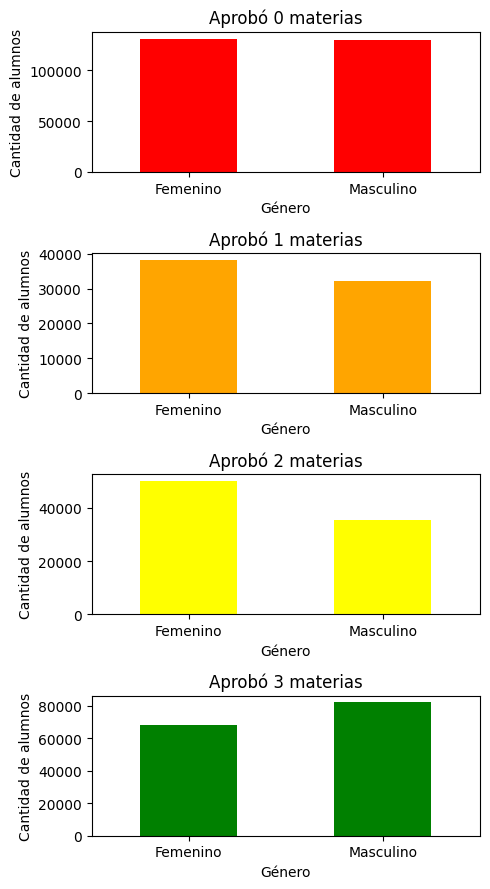

In [27]:
labels = ['Femenino', 'Masculino']
values = [0, 1, 2, 3]
colors = ['red', 'orange', 'yellow', 'green']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 9))
for i, value in enumerate(values):
    performance_gender[('CNTSTUID', value)].plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(f"Aprobó {str(value)} materias")
    axes[i].set_xticklabels(labels, rotation=0)
    axes[i].set_xlabel('Género')
    axes[i].set_ylabel('Cantidad de alumnos')
plt.tight_layout()
plt.show()

### **Género (`GENDER`) VS Notas en Materias (`MATH`, `READ`, SCIE`)**

In [28]:
grades_per_gender = df_analysis.pivot_table(
    values=['MATH', 'READ', 'SCIE'],
    index='GENDER',
    aggfunc='mean',
    fill_value=0
)

In [29]:
grades_per_gender

,MATH,READ,SCIE
GENDER,,,
Female,371.813087,409.393526,399.213253
Male,387.250915,393.369319,409.052596


In [30]:
subjects = ['MATH', 'READ', 'SCIE']
female_students = df_analysis[df_analysis['GENDER'] == 'Female']
male_students = df_analysis[df_analysis['GENDER'] == 'Male']

mean_difference_test_and_conclusion(
    group_a=female_students,
    group_b=male_students,
    values=subjects,
    index='Género'
)

Diferencia de medias con respecto a Género en MATH
Estadístico t: -76.33864962264386
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------
Diferencia de medias con respecto a Género en READ
Estadístico t: 65.08078578018655
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------
Diferencia de medias con respecto a Género en SCIE
Estadístico t: -45.57770971225215
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------


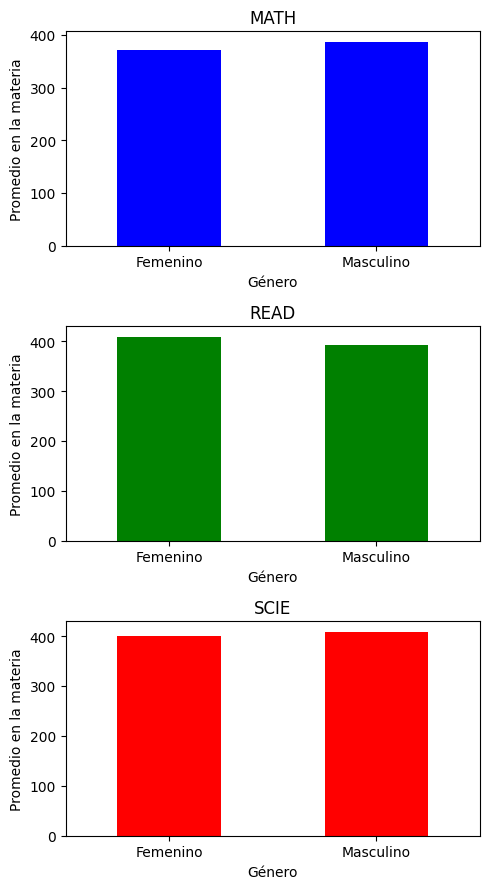

In [31]:
labels = ['Femenino', 'Masculino']
subjects = ['MATH', 'READ', 'SCIE']
colors = ['blue', 'green', 'red']

bar_plots_for_var_values(
    table=grades_per_gender,
    labels=labels,
    values=subjects,
    colors=colors,
    x_label='Género',
    y_label='Promedio en la materia'
)

### **Status inmigratorio (`IMMIG`) vs Desempeño General (`OVERALL_PERF`)**


In [32]:
performance_immig =  df_analysis.pivot_table(
    values=['CNTSTUID'],
    index='IMMIG',
    columns='OVERALL_PERF',
    aggfunc='count',
    fill_value=0
)

In [33]:
performance_immig

CNTSTUID                      
OVERALL_PERF             0      1      2       3
IMMIG                                           
First-Generation      5455   2733    887    2493
Native              230284  61378  78202  138454
Second-Generation     5028   2350   2005    3310

In [34]:
chi2_test_and_conclusion(table=performance_immig, alpha=0.05)


Frecuencias Esperadas:
╒═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│                   │   ('CNTSTUID', 0) │   ('CNTSTUID', 1) │   ('CNTSTUID', 2) │   ('CNTSTUID', 3) │
╞═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ First-Generation  │           5229.63 │           1443.58 │           1761.42 │           3133.37 │
├───────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Native            │         229799    │          63433.4  │          77399.9  │         137686    │
├───────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Second-Generation │           5738.22 │           1583.97 │           1932.72 │           3438.09 │
╘═══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╛

Estadístico chi-cuadrado: 2272.46
Grados de libertad: 6
V

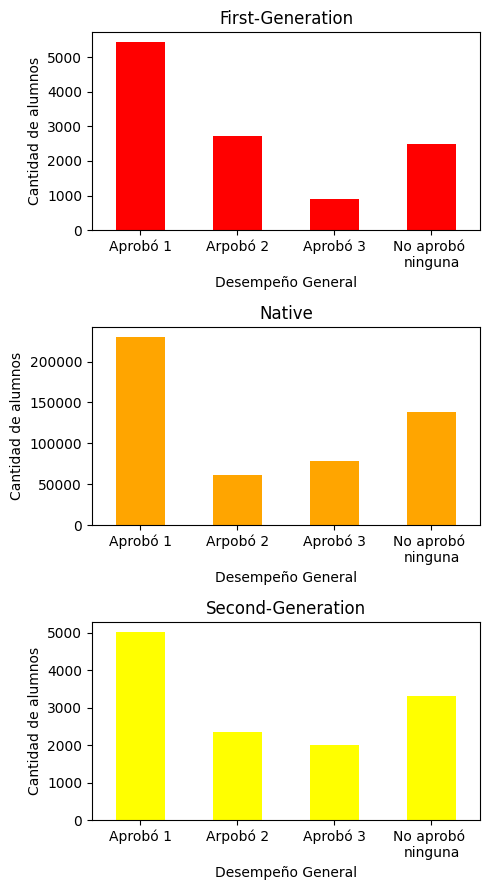

In [35]:
labels = [
    'Aprobó 1',
    'Arpobó 2',
    'Aprobó 3',
    'No aprobó \nninguna'
]
colors = ['red', 'orange', 'yellow']
statuses = list(performance_immig.transpose().columns)

bar_plots_for_var_values(
    table=performance_immig.transpose(),
    labels=labels,
    values=statuses,
    colors=colors,
    x_label='Desempeño General',
    y_label='Cantidad de alumnos'
)

### **Repitencia (`REPEAT`) vs Desempeño General (`OVERALL_PERF`)**

In [36]:
performance_repeat =  df_analysis.pivot_table(
    values=['CNTSTUID'],
    index='REPEAT',
    columns='OVERALL_PERF',
    aggfunc='count',
    fill_value=0
)

In [37]:
performance_repeat

CNTSTUID                      
OVERALL_PERF                    0      1      2       3
REPEAT                                                 
Did not repeat a <grade>   126923  54002  70493  139186
Repeated a <grade>         122086  15037  14005   10167

In [38]:
chi2_test_and_conclusion(table=performance_repeat, alpha=0.05)


Frecuencias Esperadas:
╒══════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│                          │   ('CNTSTUID', 0) │   ('CNTSTUID', 1) │   ('CNTSTUID', 2) │   ('CNTSTUID', 3) │
╞══════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ Did not repeat a <grade> │            176235 │             48862 │           59803.1 │          105704   │
├──────────────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Repeated a <grade>       │             72774 │             20177 │           24694.9 │           43649.1 │
╘══════════════════════════╧═══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╛

Estadístico chi-cuadrado: 91889.09
Grados de libertad: 3
Valor p: 0.0000

Valor crítico chi-cuadrado (α = 0.05): 7.81
Conclusión: Rechazamos la hipótesis nula: hay una relación significativa entre las variables.


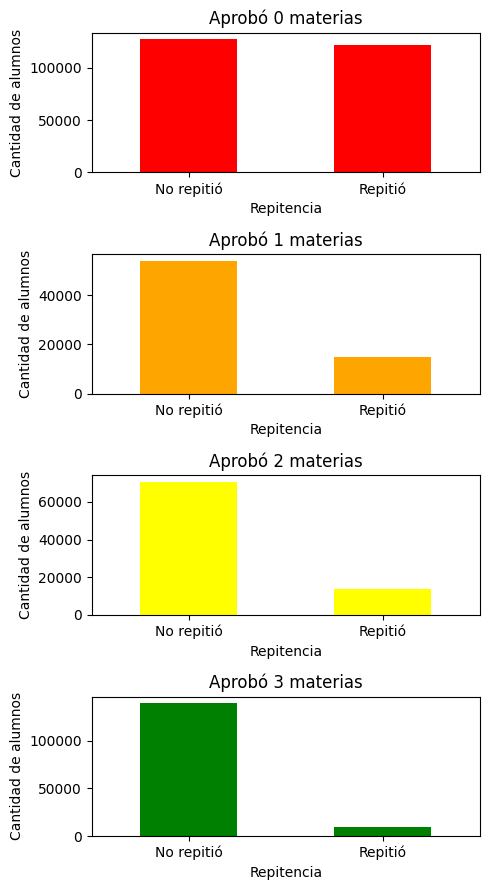

In [39]:
labels = ['No repitió', 'Repitió']
values = [0, 1, 2, 3]
colors = ['red', 'orange', 'yellow', 'green']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 9))
for i, value in enumerate(values):
    performance_repeat[('CNTSTUID', value)].plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(f"Aprobó {value} materias")
    axes[i].set_xticklabels(labels, rotation=0)
    axes[i].set_xlabel('Repitencia')
    axes[i].set_ylabel('Cantidad de alumnos')
plt.tight_layout()
plt.show()

### **Repitencia (`REPEAT`) vs Notas en Materias (`MATH`, `READ`, SCIE`)**

In [40]:
grades_repeat = df_analysis.pivot_table(
    values=['MATH', 'READ', 'SCIE'],
    index='REPEAT',
    aggfunc='mean',
    fill_value=0
)

In [41]:
grades_repeat

,MATH,READ,SCIE
REPEAT,,,
Did not repeat a <grade>,401.937346,429.152901,427.861171
Repeated a <grade>,329.161524,340.907523,351.891546


In [42]:
subjects = ['MATH', 'READ', 'SCIE']

repeated = df_analysis[df_analysis['REPEAT'] == 'Repeated a <grade>']
not_repeated = df_analysis[df_analysis['REPEAT'] == 'Did not repeat a <grade>']

mean_difference_test_and_conclusion(
    group_a=not_repeated,
    group_b=repeated,
    values=subjects,
    index='Repitencia'
)

Diferencia de medias con respecto a Repitencia en MATH
Estadístico t: 375.42081270218
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------
Diferencia de medias con respecto a Repitencia en READ
Estadístico t: 372.8217184372109
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------
Diferencia de medias con respecto a Repitencia en SCIE
Estadístico t: 375.70864118902546
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------


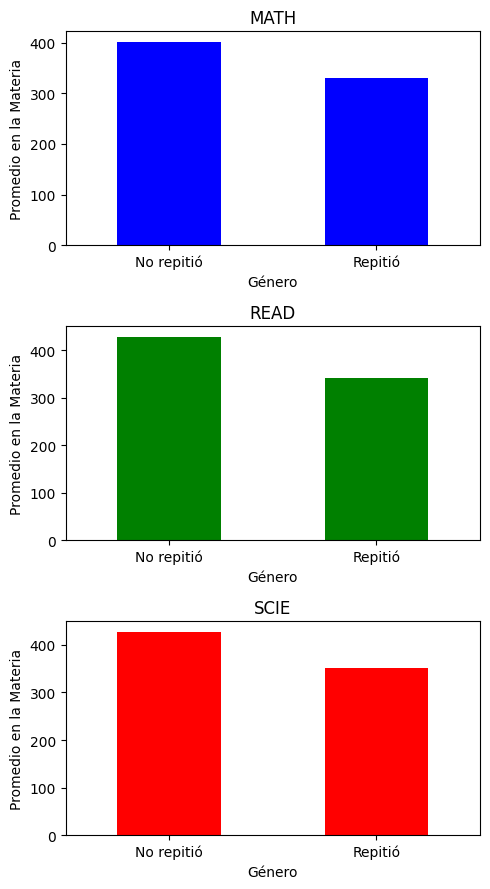

In [43]:
subjects = ['MATH', 'READ', 'SCIE']
labels = ['No repitió', 'Repitió']
colors = ['blue', 'green', 'red']

bar_plots_for_var_values(
    table=grades_repeat,
    labels=labels,
    values=subjects,
    colors=colors,
    x_label='Género',
    y_label='Promedio en la Materia'
)

### **Tipo de escuela (`PRIVATESCH`) vs Desempeño General (`OVERALL_PERF`)**

In [44]:
performance_privatesch =  df_analysis.pivot_table(
    values=['CNTSTUID'],
    index='PRIVATESCH',
    columns='OVERALL_PERF',
    aggfunc='count',
    fill_value=0
)

In [45]:
performance_privatesch

CNTSTUID                     
OVERALL_PERF        0      1      2      3
PRIVATESCH                                
private         39576  19217  32724  90467
public         220500  51181  52926  59659

In [46]:
chi2_test_and_conclusion(table=performance_privatesch, alpha=0.05)


Frecuencias Esperadas:
╒═════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│         │   ('CNTSTUID', 0) │   ('CNTSTUID', 1) │   ('CNTSTUID', 2) │   ('CNTSTUID', 3) │
╞═════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ private │           83584.4 │           22624.8 │           27526.6 │           48248.2 │
├─────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ public  │          176492   │           47773.2 │           58123.4 │          101878   │
╘═════════╧═══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╛

Estadístico chi-cuadrado: 90785.79
Grados de libertad: 3
Valor p: 0.0000

Valor crítico chi-cuadrado (α = 0.05): 7.81
Conclusión: Rechazamos la hipótesis nula: hay una relación significativa entre las variables.


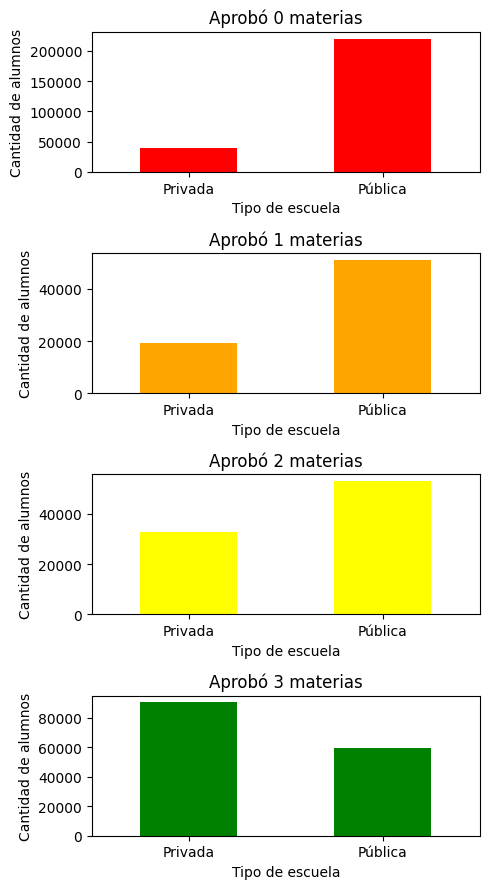

In [47]:
labels = ['Privada', 'Pública']
colors = ['red', 'orange', 'yellow', 'green']
values = [0, 1, 2, 3]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 9))
for i, value in enumerate(values):
    performance_privatesch[('CNTSTUID', value)].plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(f'Aprobó {value} materias')
    axes[i].set_xticklabels(labels, rotation=0)
    axes[i].set_xlabel('Tipo de escuela')
    axes[i].set_ylabel('Cantidad de alumnos')
plt.tight_layout()
plt.show()

### **Tipo de escuela (`PRIVATESCH`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

In [48]:
grades_privatesch =  df_analysis.pivot_table(
    values=['MATH', 'READ', 'SCIE'],
    index='PRIVATESCH',
    aggfunc='mean',
    fill_value=0
)

In [49]:
grades_privatesch

,MATH,READ,SCIE
PRIVATESCH,,,
private,424.951065,454.768105,450.555289
public,357.857614,376.268779,382.043018


In [50]:
subjects = ['MATH', 'READ', 'SCIE']

private = df_analysis[df_analysis['PRIVATESCH'] == 'private']
public = df_analysis[df_analysis['PRIVATESCH'] == 'public']

mean_difference_test_and_conclusion(
    group_a=private,
    group_b=public,
    values=subjects,
    index='Tipo de Escuela (Pública o Privada)'
)

Diferencia de medias con respecto a Tipo de Escuela (Pública o Privada) en MATH
Estadístico t: 335.3224095086147
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------
Diferencia de medias con respecto a Tipo de Escuela (Pública o Privada) en READ
Estadístico t: 324.16108976797204
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------
Diferencia de medias con respecto a Tipo de Escuela (Pública o Privada) en SCIE
Estadístico t: 318.09803018315773
Valor p: 0.0

Rechazamos la hipótesis nula. Las medias son significativamente diferentes.
---------------------------------------------------------------------


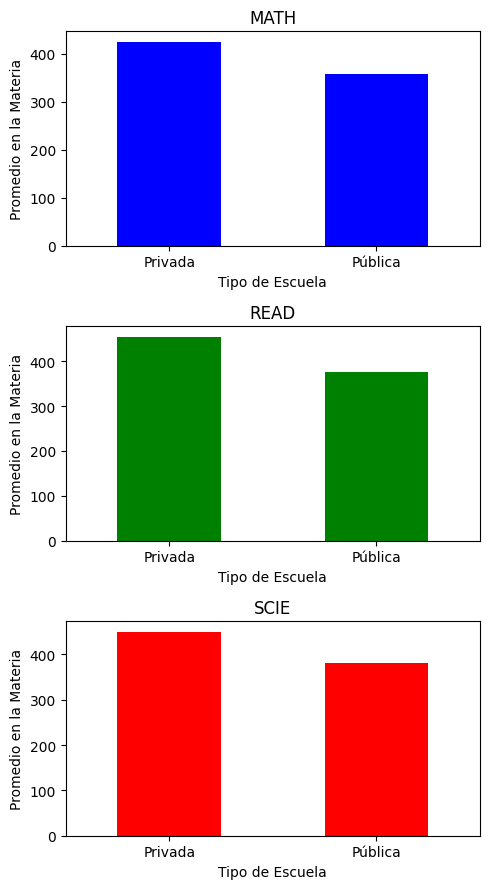

In [51]:
labels = ['Privada', 'Pública']
subjects = ['MATH', 'READ', 'SCIE']
colors = ['blue', 'green', 'red']

bar_plots_for_var_values(
    table=grades_privatesch,
    labels=labels,
    values=subjects,
    colors=colors,
    x_label='Tipo de Escuela',
    y_label='Promedio en la Materia'
)

### **Propietario de escuela (`SCHLTYPE`) vs Desempeño General (`OVERALL_PERF`)**

In [52]:
performance_schltype =  df_analysis.pivot_table(
    values=['CNTSTUID'],
    index='SCHLTYPE',
    columns='OVERALL_PERF',
    aggfunc='count',
    fill_value=0
)

In [53]:
performance_schltype

CNTSTUID                     
OVERALL_PERF                        0      1      2      3
SCHLTYPE                                                  
Private Government-dependent    26860  13332  22214  54675
Private Independent              8137   3110   6464  26230
Public                         220669  51782  53033  61443

In [54]:
chi2_test_and_conclusion(table=performance_schltype, alpha=0.05)


Frecuencias Esperadas:
╒══════════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│                              │   ('CNTSTUID', 0) │   ('CNTSTUID', 1) │   ('CNTSTUID', 2) │   ('CNTSTUID', 3) │
╞══════════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ Private Government-dependent │           54628.5 │           14577.5 │          17459.3  │           30415.7 │
├──────────────────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Private Independent          │           20502.3 │            5471   │           6552.55 │           11415.1 │
├──────────────────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Public                       │          180535   │           48175.5 │          57699.2  │          100517   │
╘══════════════════════════════╧═══════════════════╧═══════════════════╧

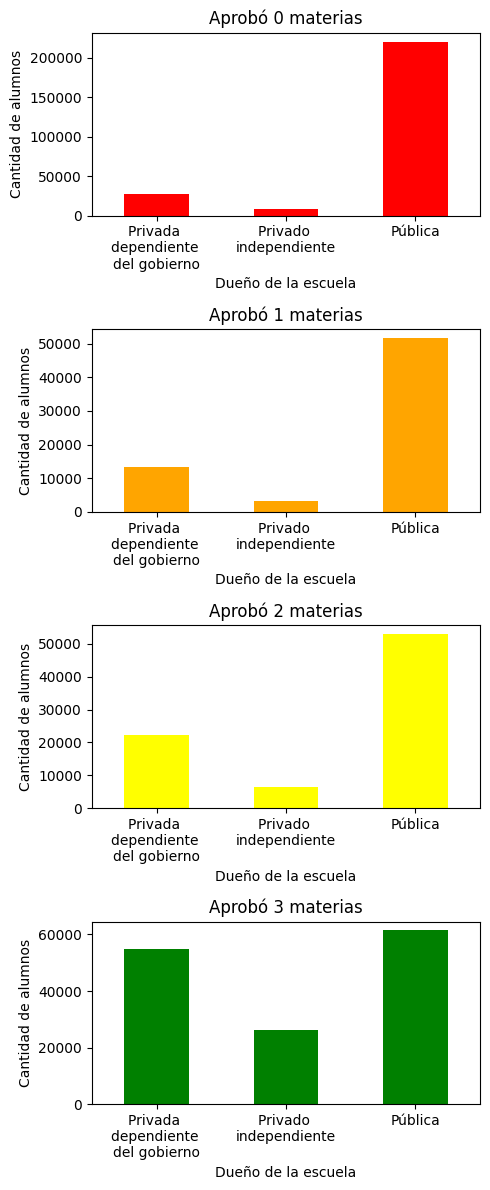

In [55]:
labels = [
    'Privada \ndependiente \ndel gobierno',
    'Privado \nindependiente',
    'Pública'
]
values = [0, 1, 2, 3]
colors = ['red', 'orange', 'yellow', 'green']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(5, 12))
for i, value in enumerate(values):
    performance_schltype[('CNTSTUID', value)].plot(kind='bar', ax=axes[i], color=colors[i])
    axes[i].set_title(f"Aprobó {value} materias")
    axes[i].set_xticklabels(labels, rotation=0)
    axes[i].set_xlabel('Dueño de la escuela')
    axes[i].set_ylabel('Cantidad de alumnos')
plt.tight_layout()
plt.show()

### **Propietario de escuela (`SCHLTYPE`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

In [56]:
grades_schltpye = df_analysis.pivot_table(
    values=['MATH', 'READ', 'SCIE'],
    index='SCHLTYPE',
    aggfunc='mean',
    fill_value=0
)

In [57]:
grades_schltpye

,MATH,READ,SCIE
SCHLTYPE,,,
Private Government-dependent,418.716897,449.713415,446.075491
Private Independent,443.576451,471.510128,466.451094
Public,358.470368,376.953616,382.656091


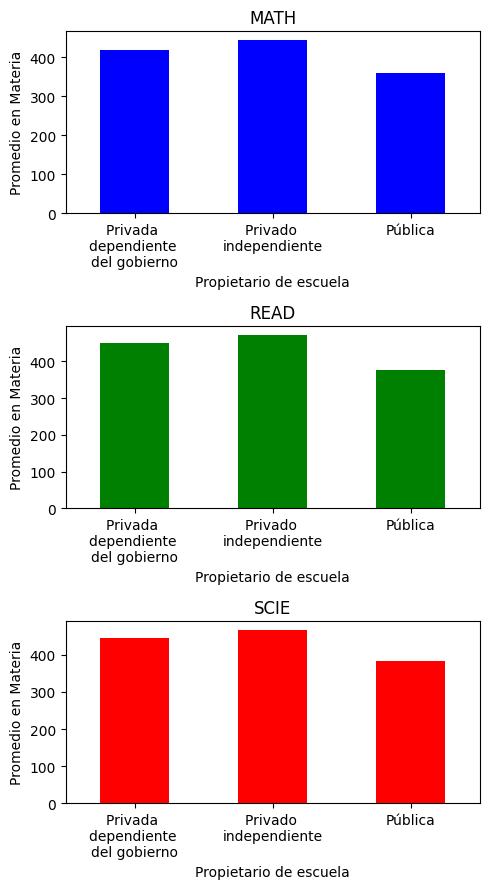

In [58]:
labels = [
    'Privada \ndependiente \ndel gobierno',
    'Privado \nindependiente',
    'Pública'
]
subjects = ['MATH', 'READ', 'SCIE']
colors = ['blue', 'green', 'red']

bar_plots_for_var_values(
    table=grades_schltpye,
    labels=labels,
    values=subjects,
    colors=colors,
    x_label='Propietario de escuela',
    y_label='Promedio en Materia'
)

## **Parte 2: Evaluando impacto de las variables contInuas en las notas**

### **Funciones auxiliares**

In [59]:
def regression_for_subjects(var: str, drop_nan: bool = True, df=df_analysis):
    subjects = ['MATH', 'READ', 'SCIE']
    columns = [var] + subjects
    df_to_apply_regression = df[columns].copy()

    if drop_nan:
        df_to_apply_regression.dropna(subset=[var], inplace=True)

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))
    for i, column in enumerate(subjects):
        x = df_to_apply_regression[var].values.reshape(-1, 1)
        y = df_to_apply_regression[column].values

        model = LinearRegression()
        model.fit(x, y)

        y_pred = model.predict(x)

        r2 = r2_score(y, y_pred)

        axs[i].scatter(x, y, label='Data')
        axs[i].plot(x, y_pred, color='red', label=f'Linear fit, $R^2$={r2:.2f}')
        axs[i].set_title(f'{var} vs {column}')
        axs[i].set_xlabel(f'{var}')
        axs[i].set_ylabel(column)
        axs[i].legend(loc='upper right')

    plt.tight_layout()
    plt.show()

### **Edad (`AGE`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

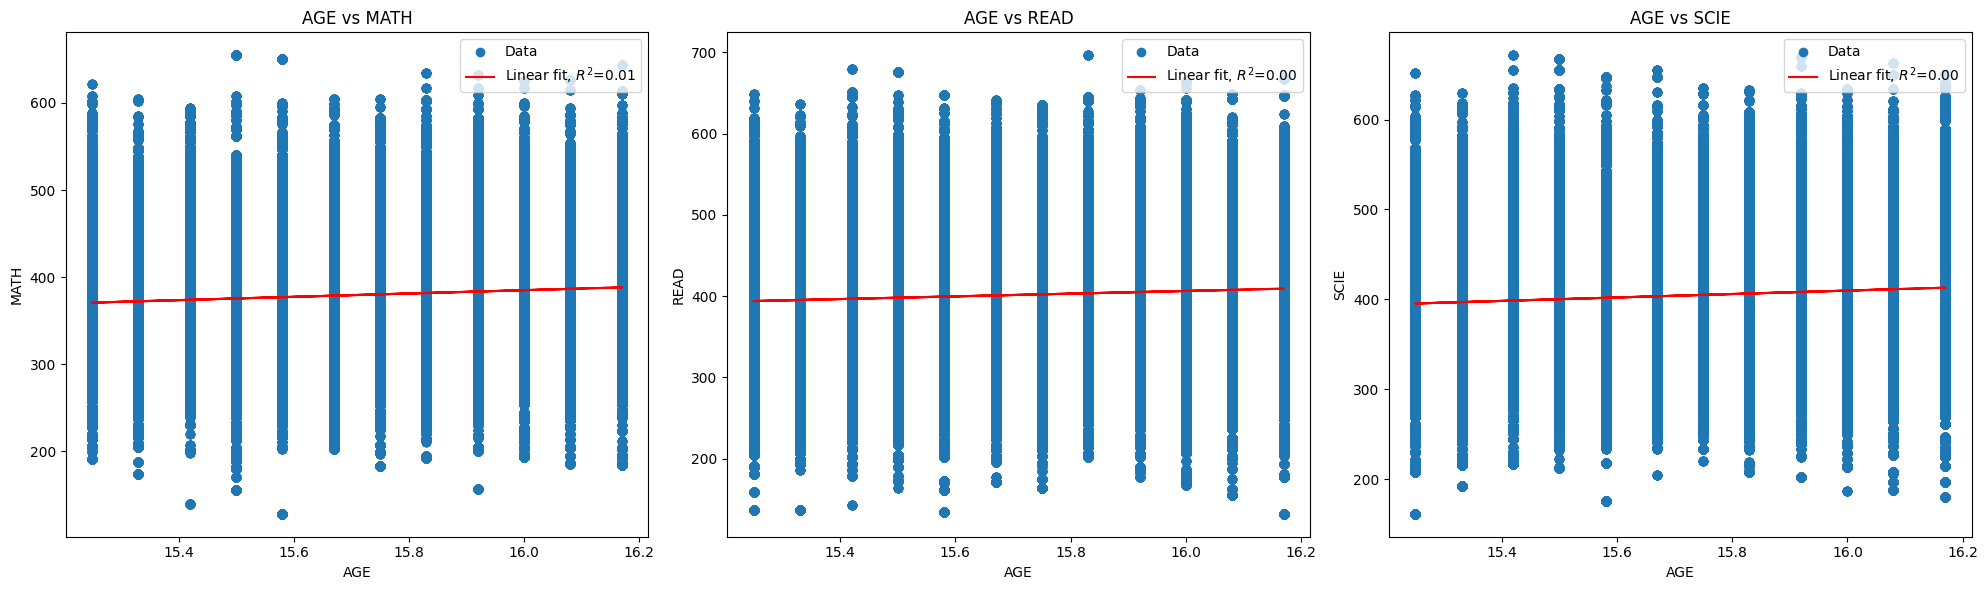

In [60]:
# AGE: Edad
regression_for_subjects(var='AGE')

### **Nivel educativo de los padres (`PARED`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

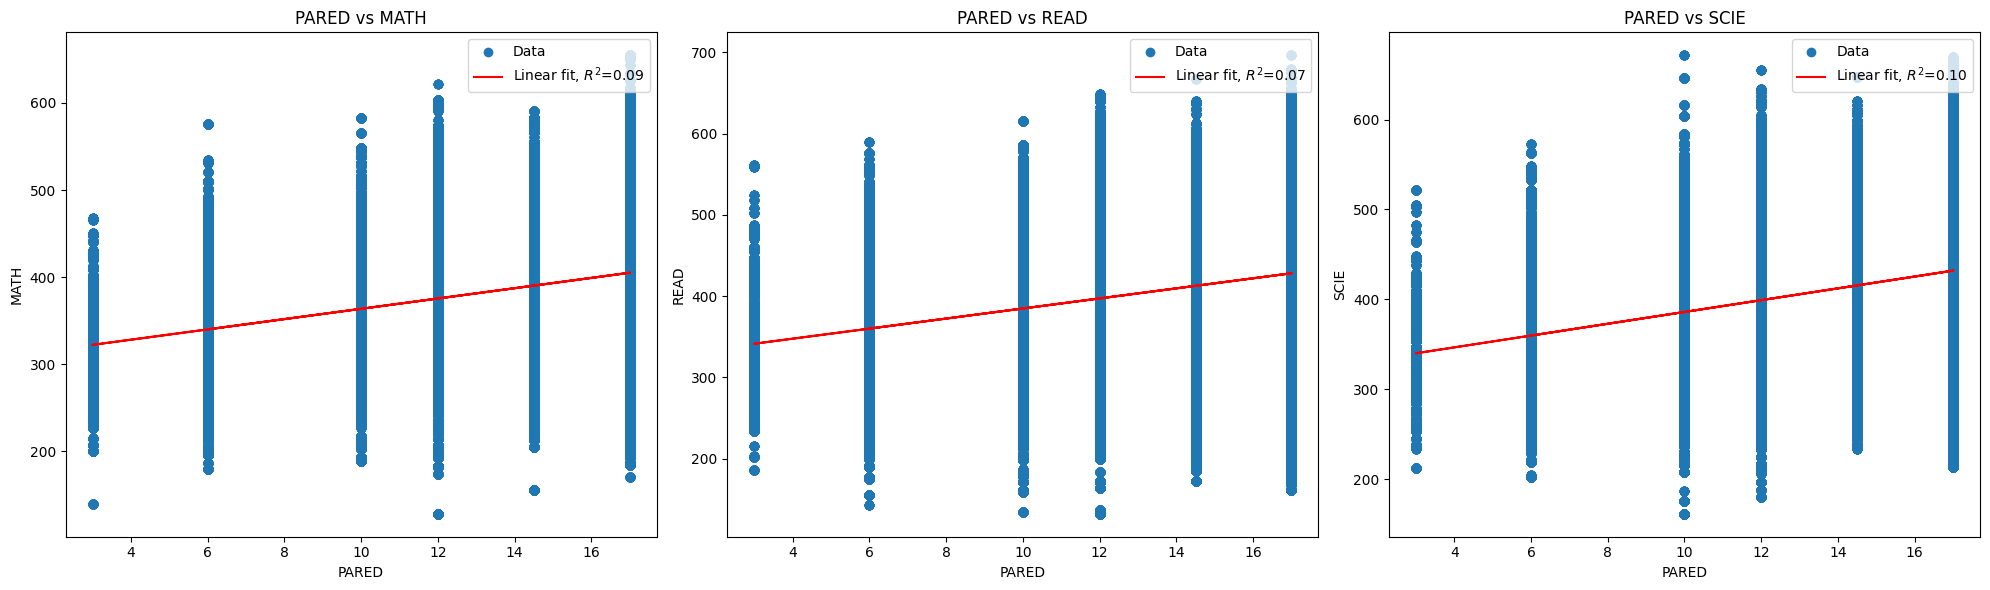

In [61]:
# PARED: Index highest parental education in years of schooling
# (Índice de nivel educativo de los padres en años de colegio)
regression_for_subjects(var='PARED')

### **Nivel de ocupación de los padres (`HISEI`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

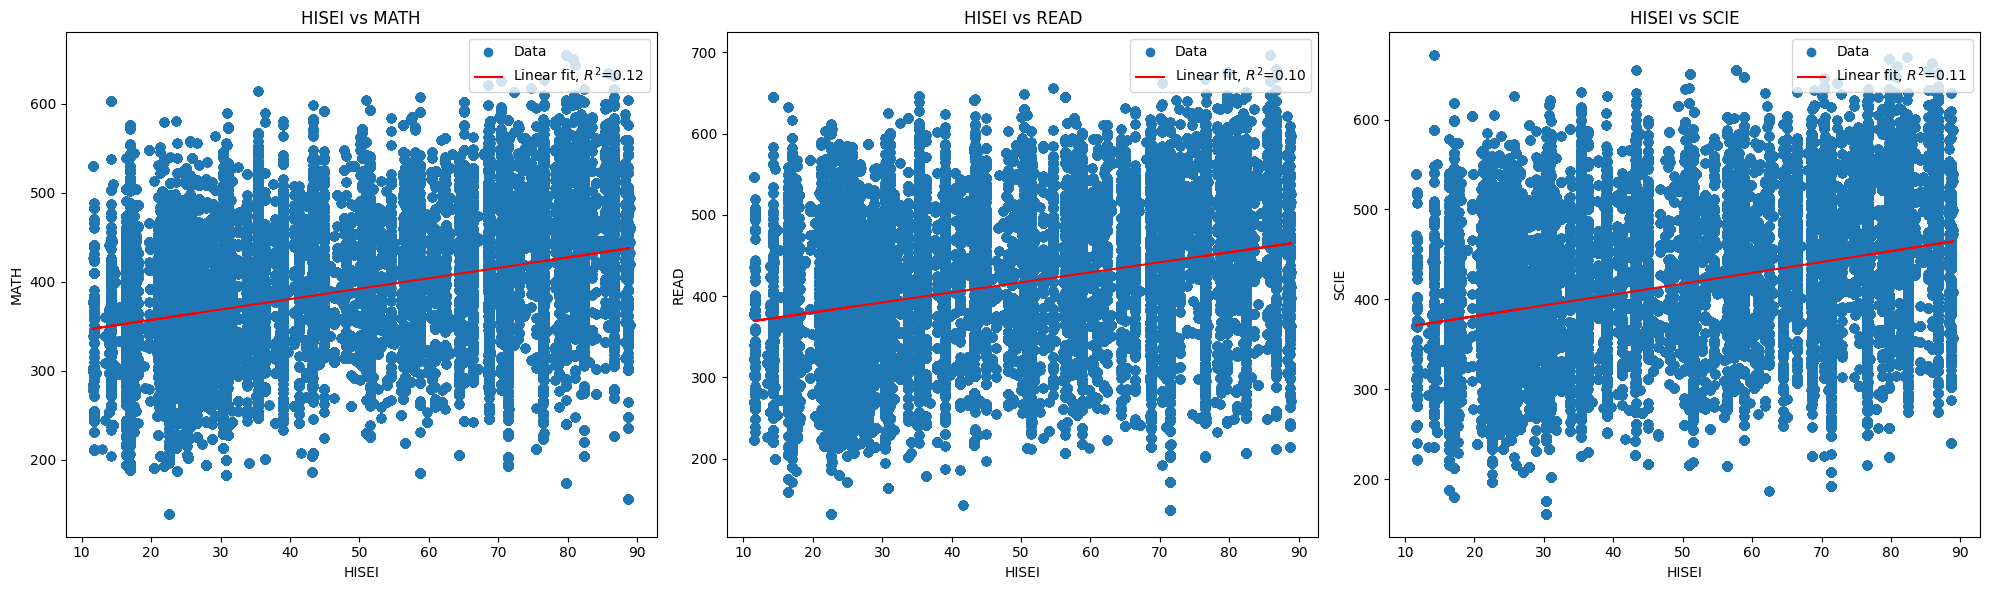

In [62]:
# HISEI: Index highest parental occupational status
# (Índice de ocupación de los padres)
regression_for_subjects(var='HISEI')

### **Duración de la educación y atención durante la infancia (`DURECEC`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

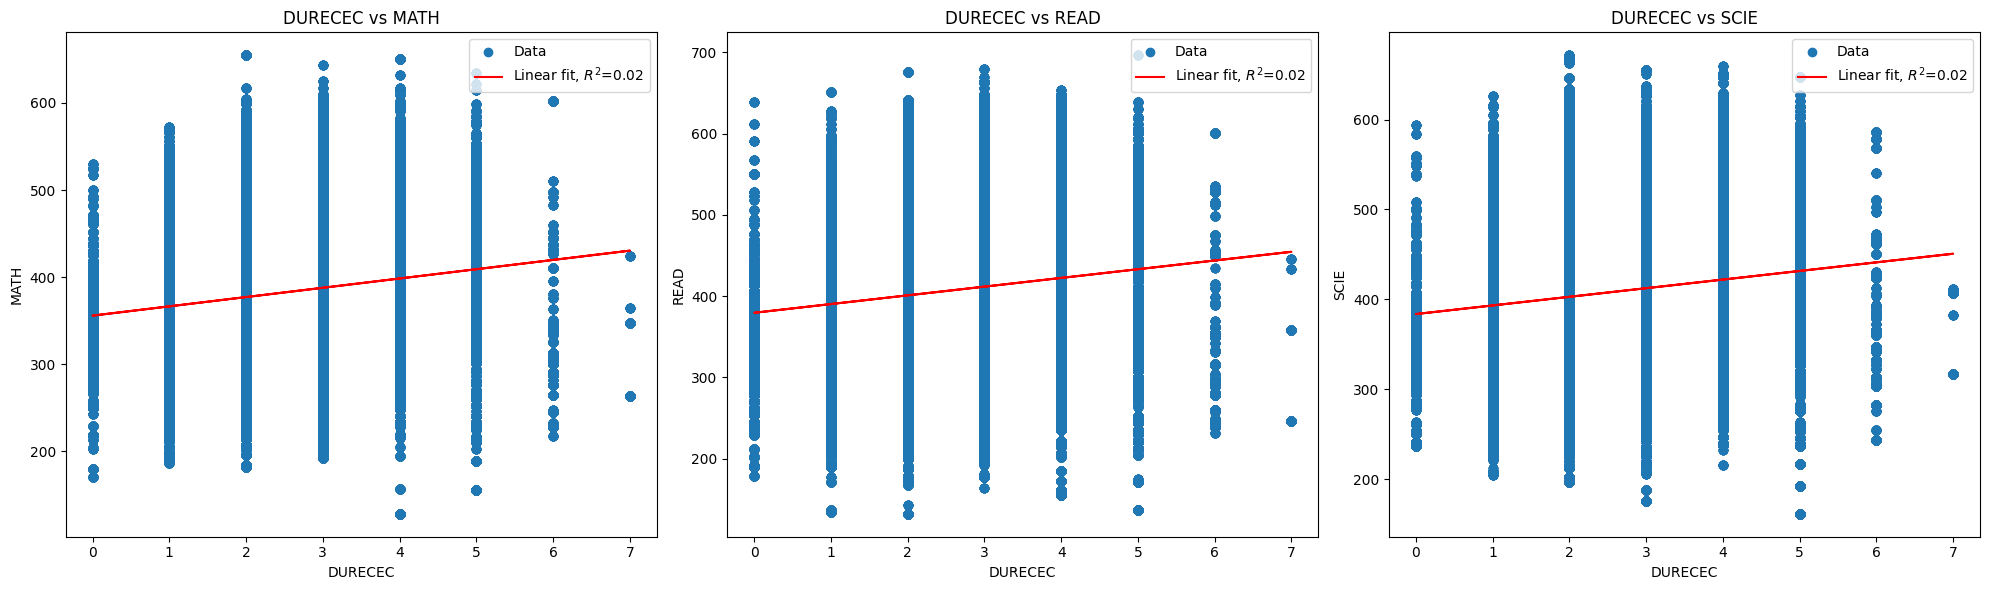

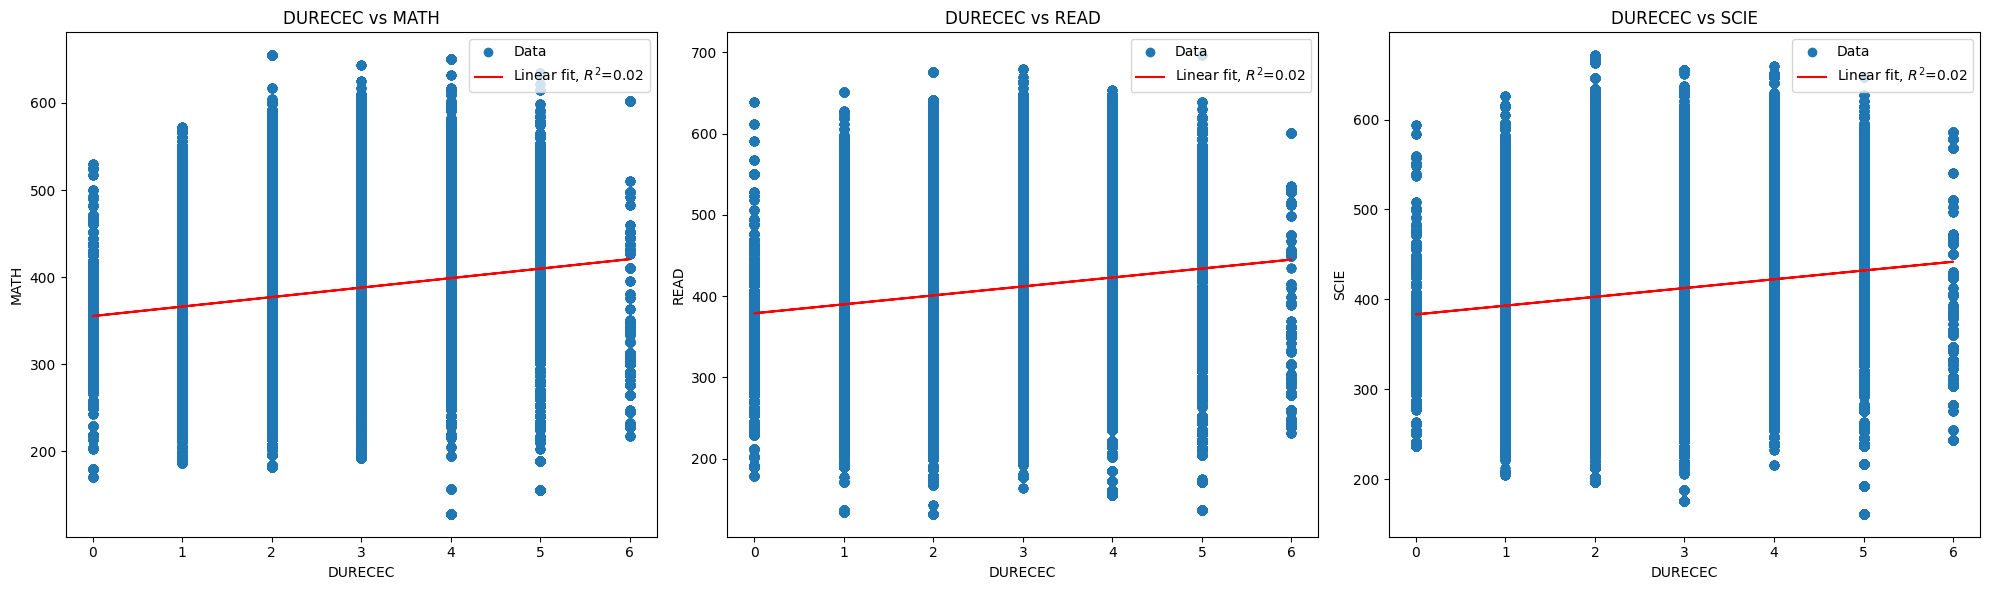

In [63]:
# DURECEC: Duration in early childhood education and care
# (Duración de la educación y atención durante la infancia)
regression_for_subjects(var='DURECEC')

df_drop_durecec_outliers = df_analysis[df_analysis.DURECEC < 7]

regression_for_subjects(var='DURECEC', df=df_drop_durecec_outliers)

### **Status ecónomico, social y cultural (`ESCS`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

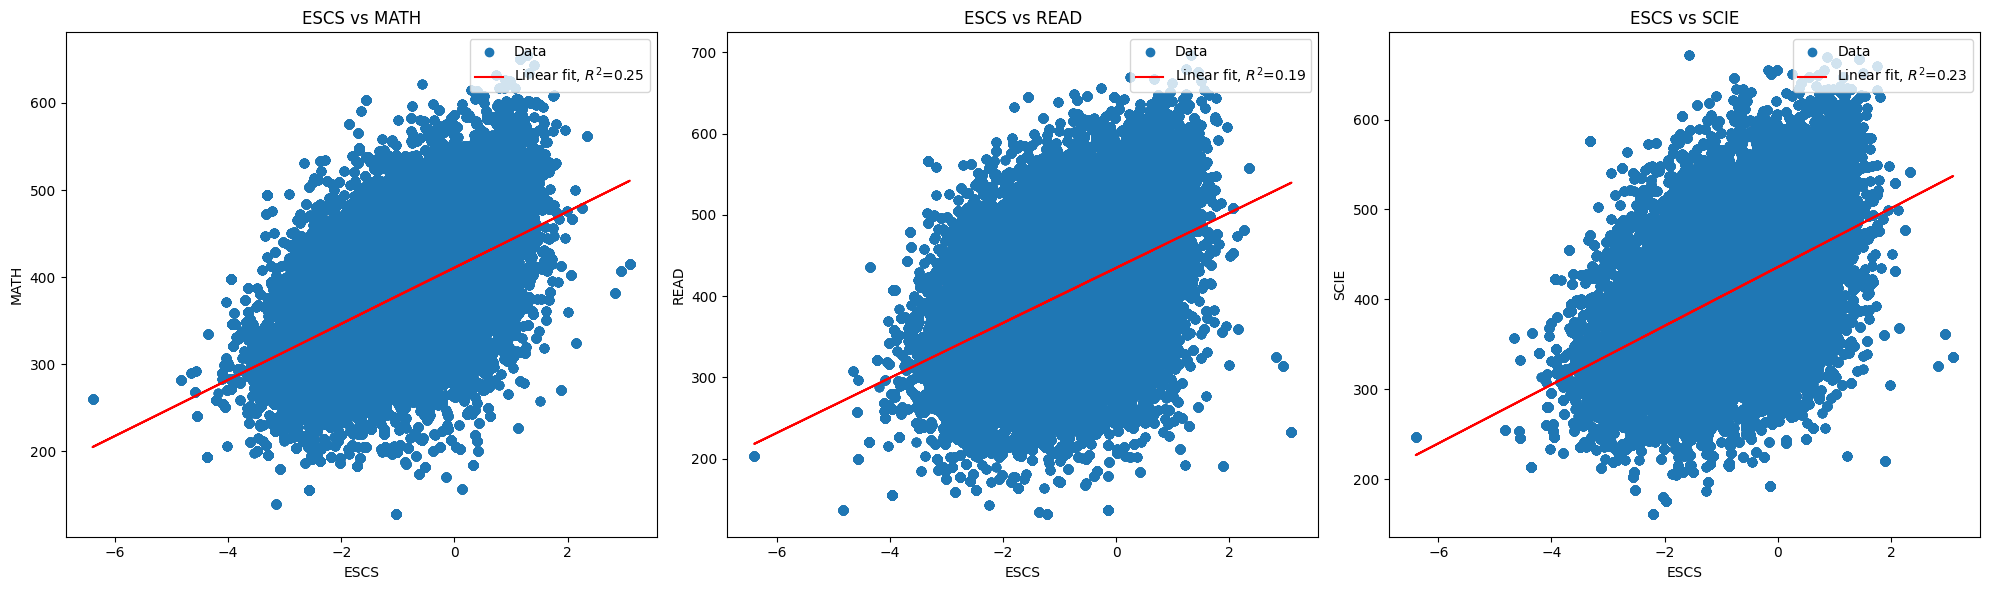

In [64]:
# ESCS: Index of economic, social and cultural status
# (Índice de status ecónomico, social y cultural)
regression_for_subjects(var='ESCS')

### **Posesiones culturales (`CULTPOSS`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

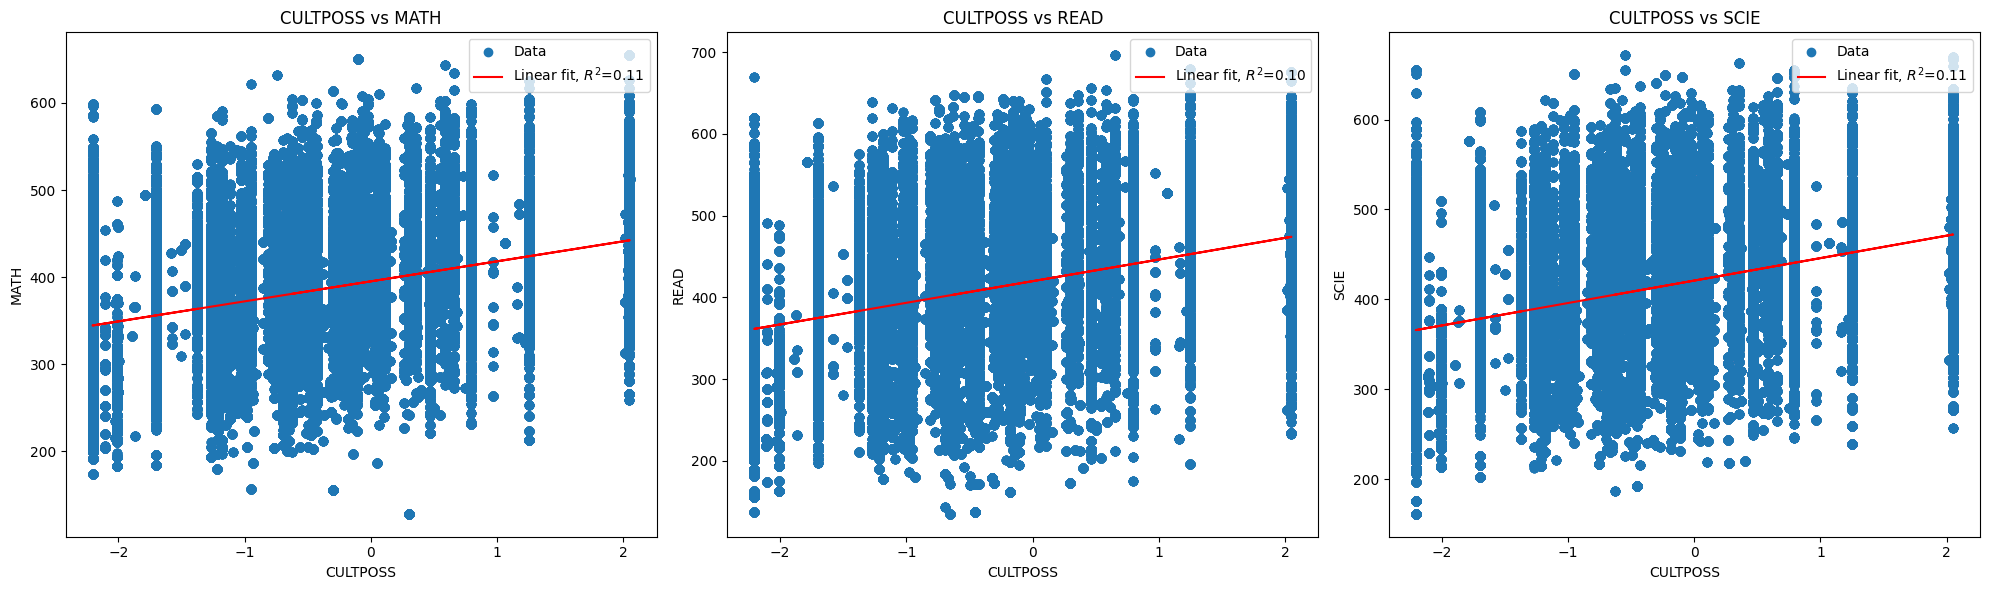

In [65]:
# CULTPOSS: Cultural possessions at home (WLE)
# (Posesiones culturales en el hogar)
regression_for_subjects(var='CULTPOSS')

### **Clima disciplinario (`DISCLIMA`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

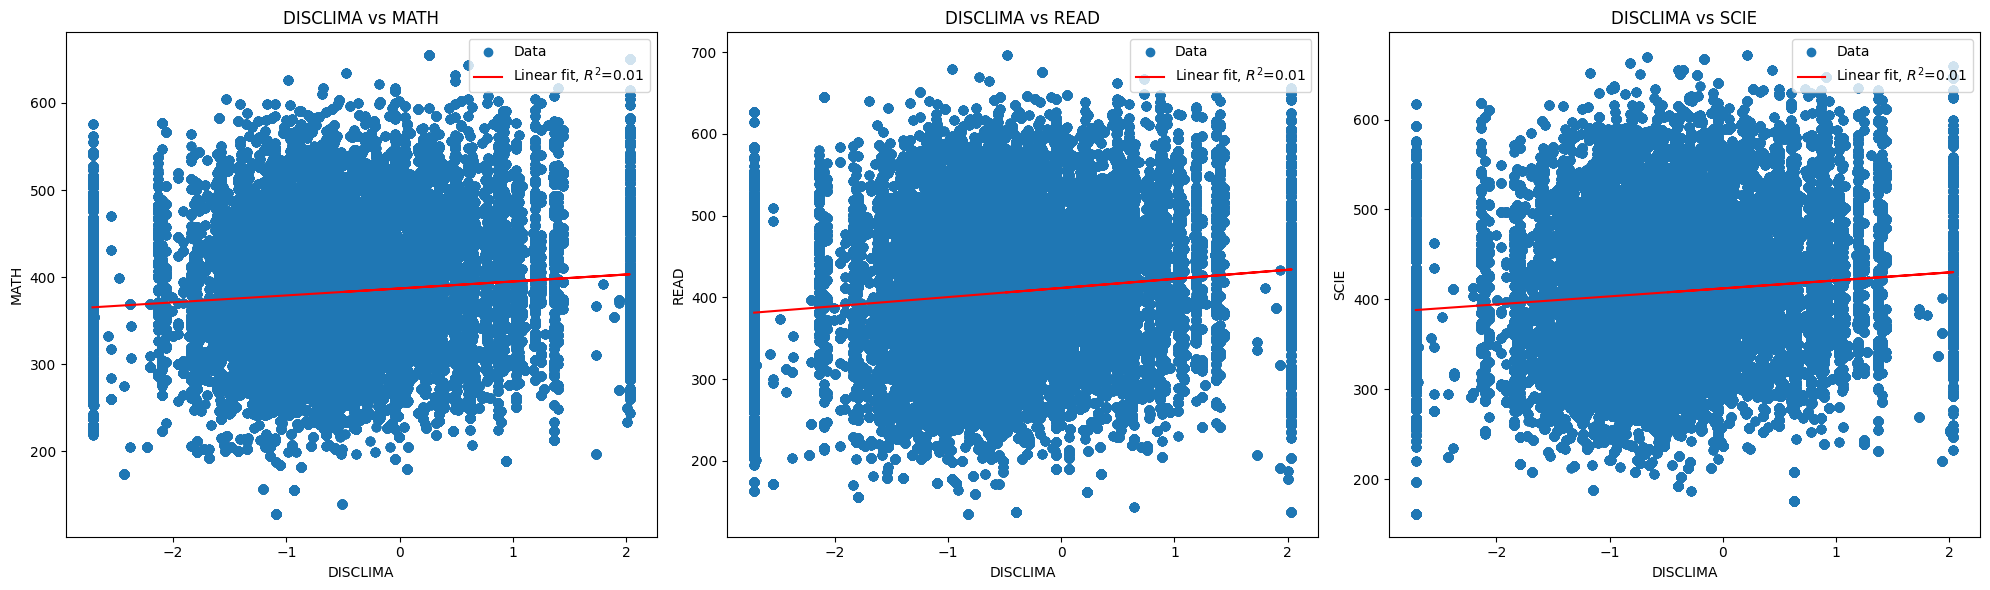

In [66]:
# DISCLIMA: Disciplinary climate in test language lessons (WLE)
# PISA adopts a more pragmatic definition according to which the disciplinary climate
# is measured by the extent to which students miss learning opportunities due to
# disruptive behaviour in the classroom.
# (Fuente: https://www.oecd-ilibrary.org/docserver/f05bb3ee-en.pdf?expires=1723329058&id=id&accname=guest&checksum=43FA60777E3F265380071CC39A8E2DA1#:~:text=One%20of%20the%20key%20components,%2C%201979%5B1%5D).)
regression_for_subjects(var='DISCLIMA')

### **Percepción de competitivad (`PERCOMP`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

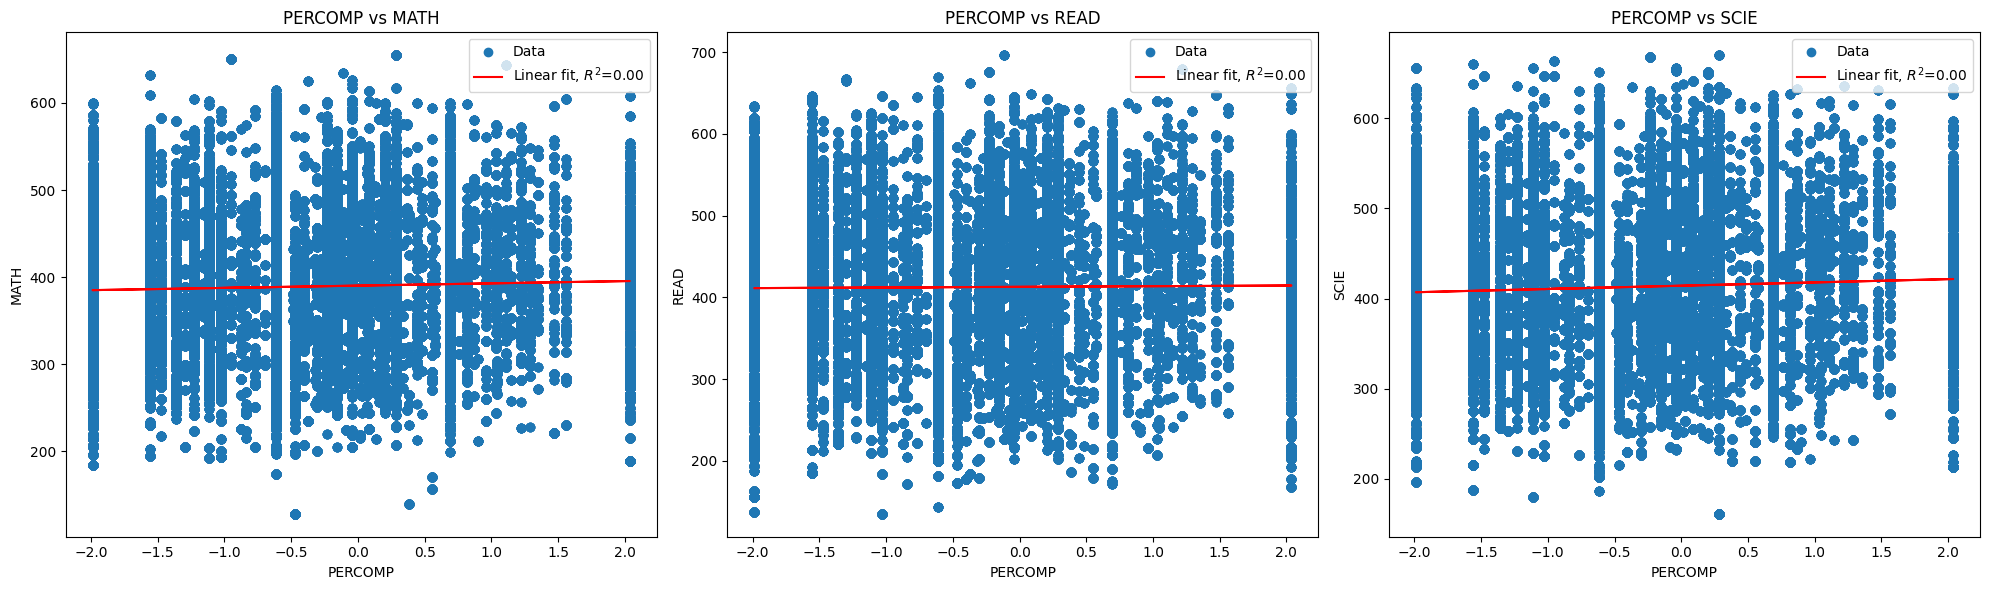

In [67]:
# PERCOMP: Perception of competitiveness at school (WLE)
# (Autopercepción de la competitivdad en la escuela)
regression_for_subjects(var='PERCOMP')

### **Proporción Alumno-Profesor (`STRATIO`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

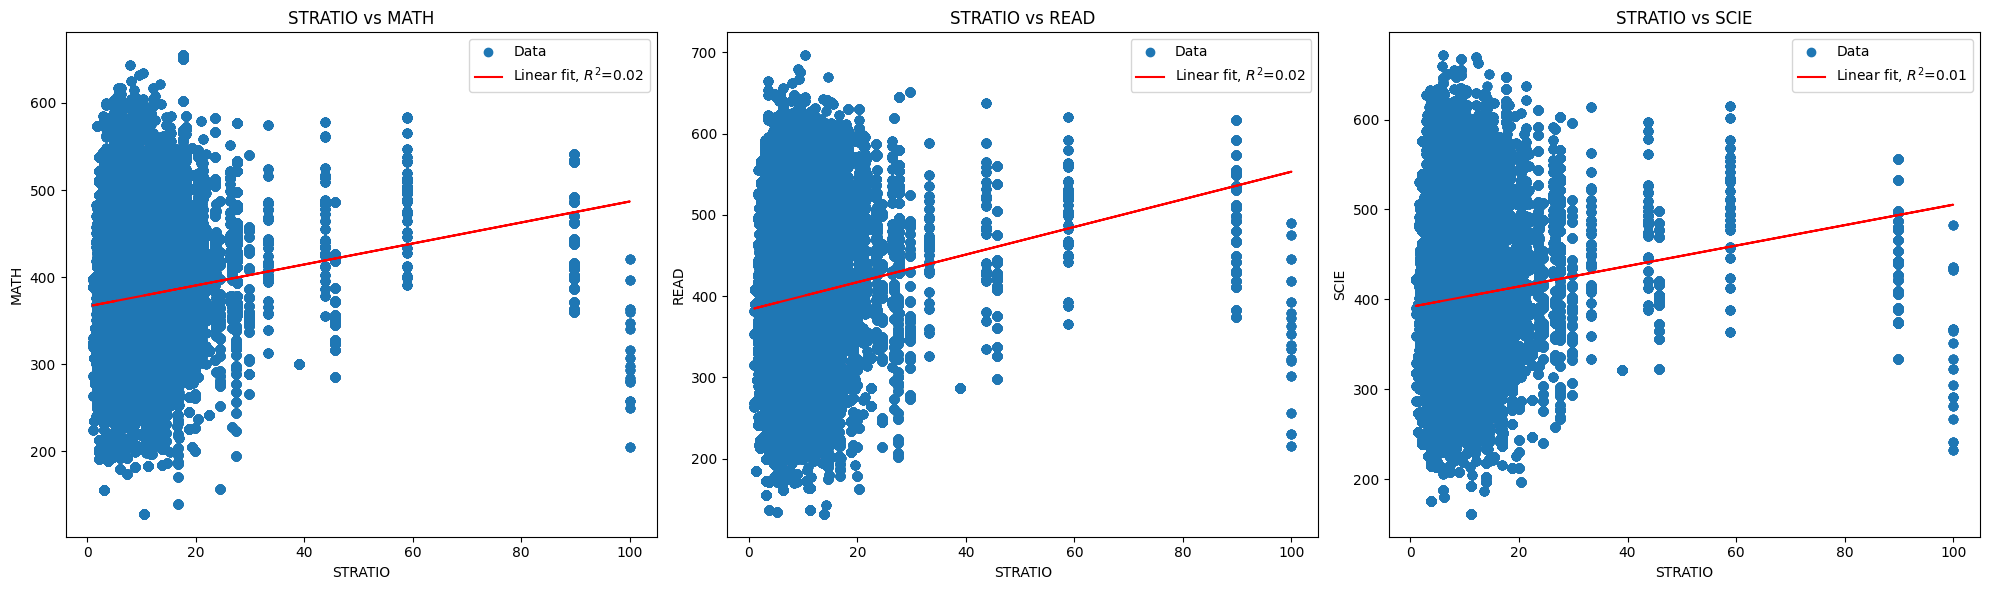

In [68]:
# STRATIO: Student-Teacher ratio
# (Proporción Alumno-Profesor, es decir número de alumnos por cada profesor)
regression_for_subjects(var='STRATIO')

### **Tamaño de la escuela (`SCHSIZE`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

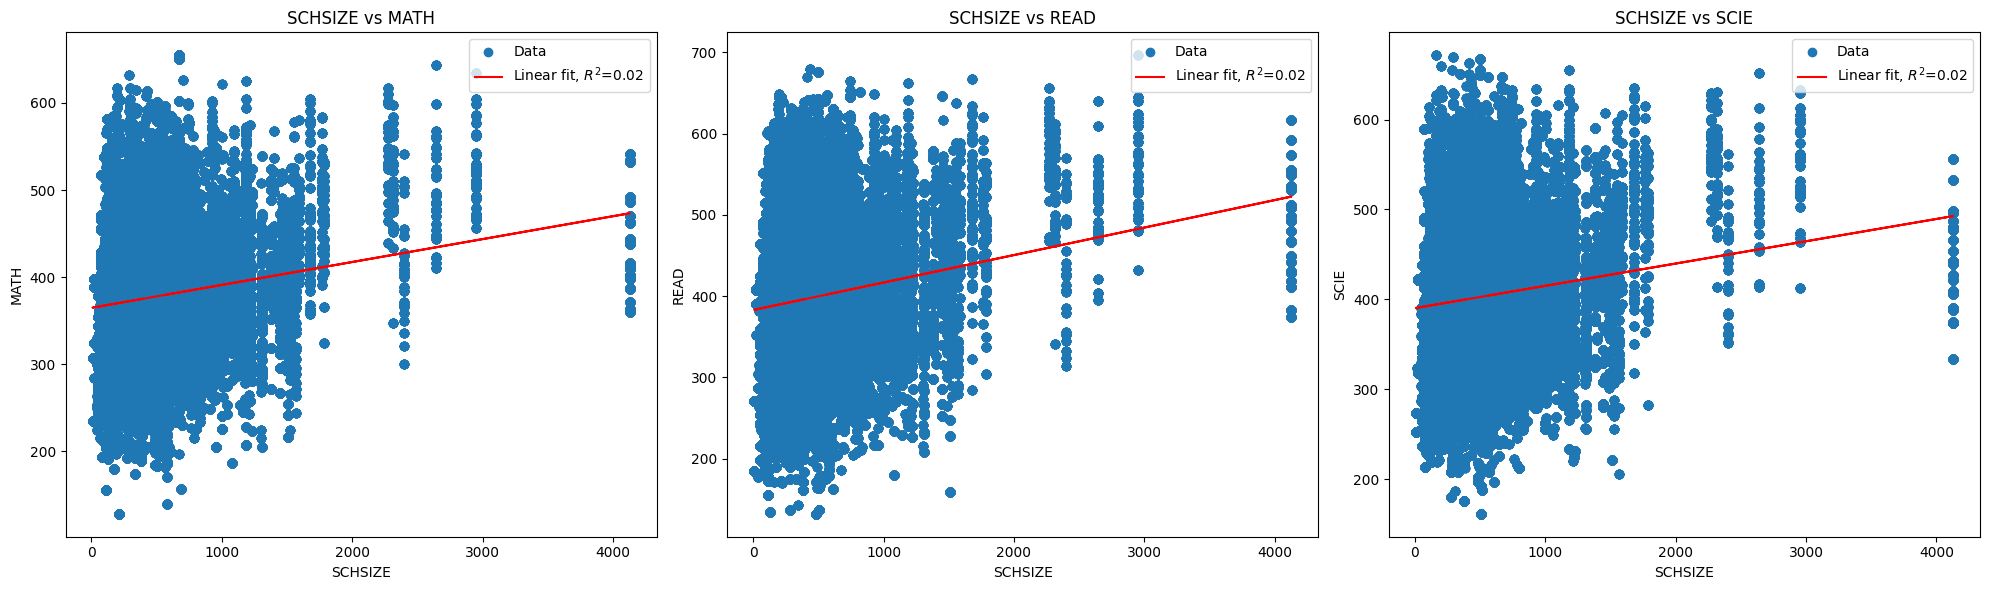

In [69]:
# SCHSIZE: School Size
# (Tamaño de la escuela)
regression_for_subjects(var='SCHSIZE')

### **Computadoras disponibles por alumnso (`RATCMP1`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

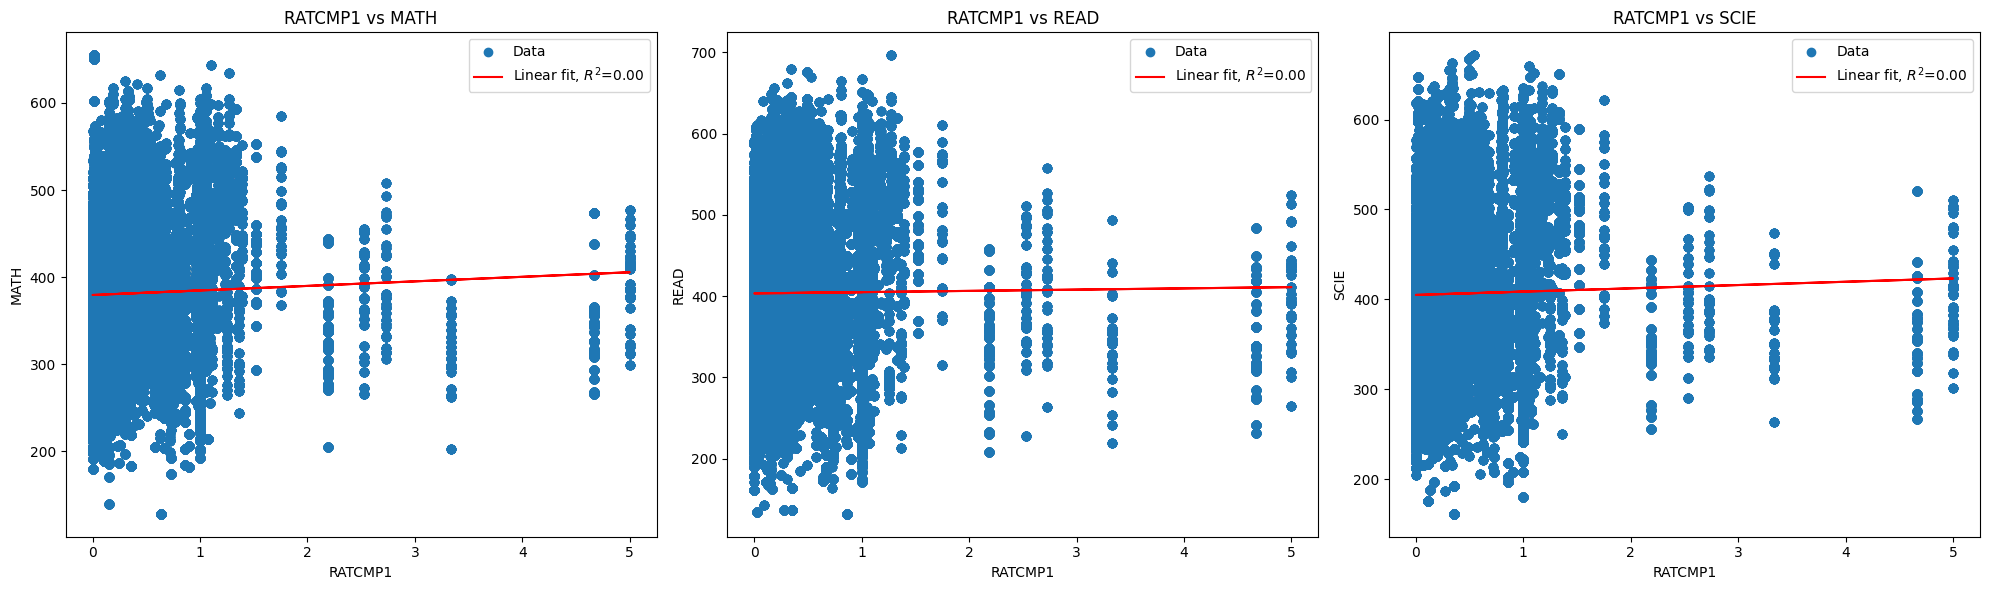

In [70]:
# RATCMP1: Number of available computers per student at modal grade
# (Número de computadoras disponibles por alumno en el grado modal)
regression_for_subjects(var='RATCMP1')

### **Número total de profesores en la escuela (`TOTAT`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

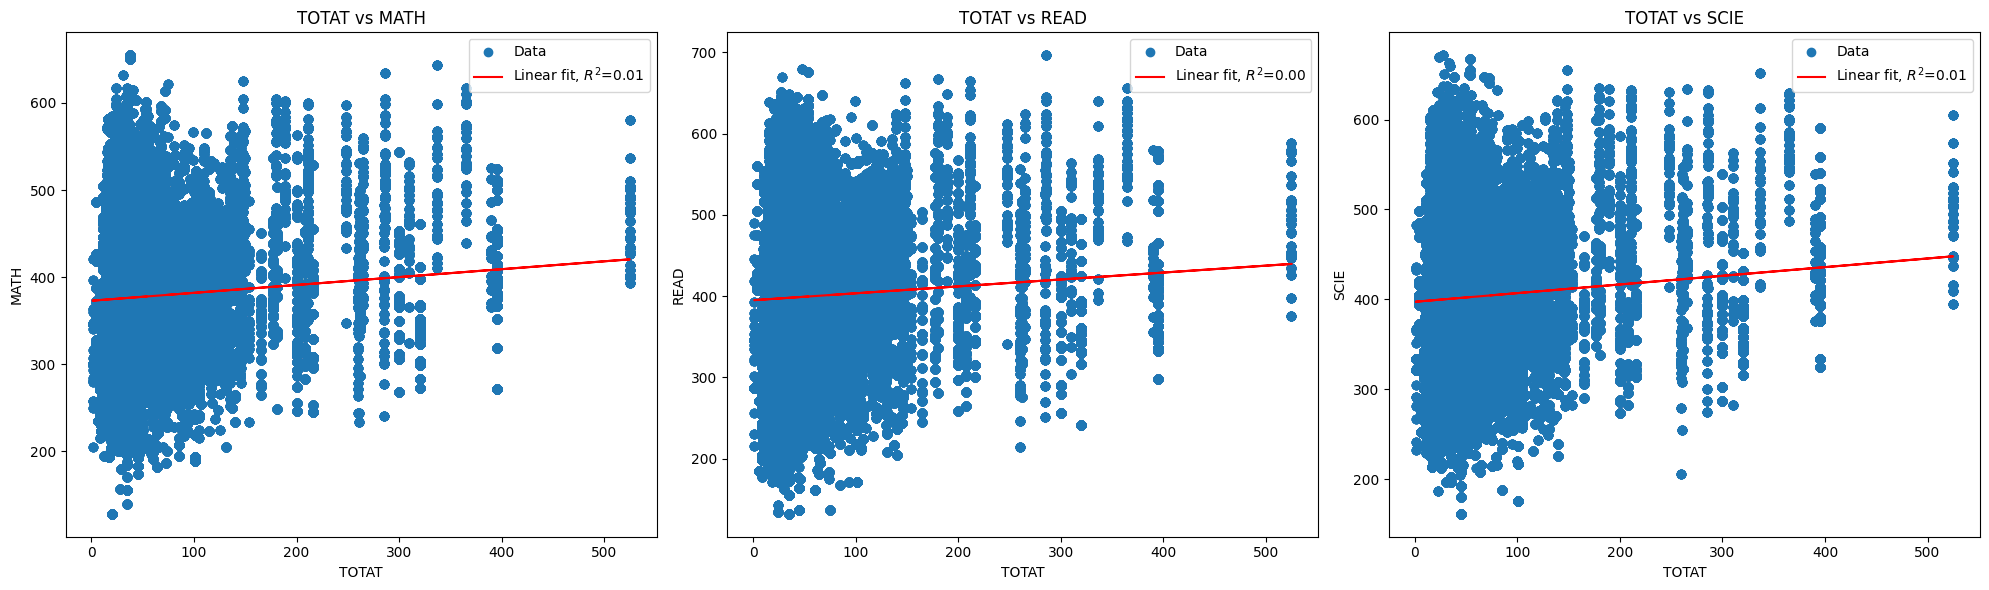

In [71]:
# TOTAT: Total number of all teachers at school
# (Número total de profesores en la escuela)
regression_for_subjects(var='TOTAT')

### **Proporción de profesores certificados (`PROATCE`) vs Notas en Materias (`MATH`, `READ`, `SCIE`)**

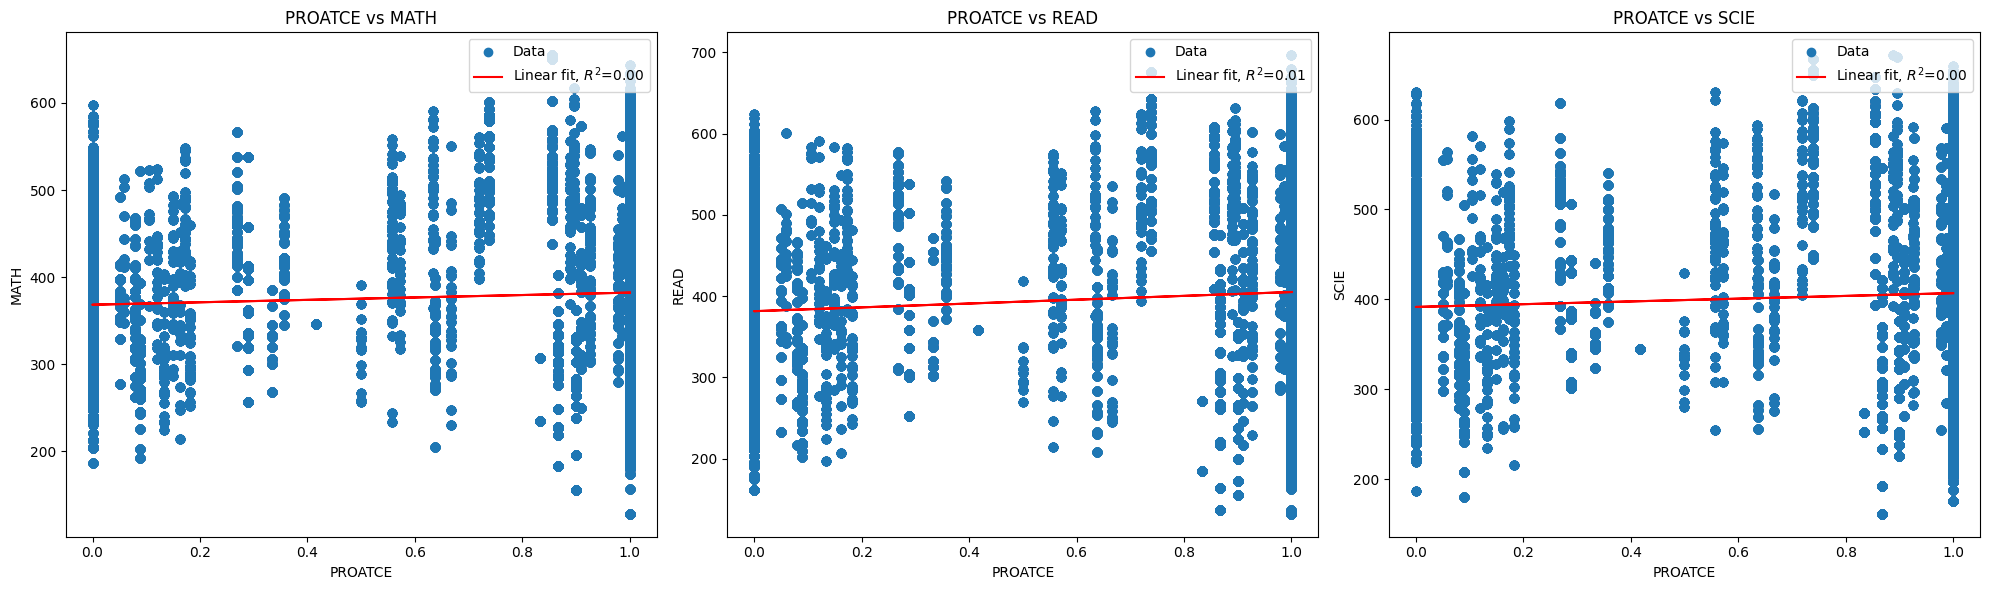

In [72]:
# PROATCE: Index proportion of all teachers fully certified
# (Proporción de profesores completamente certificados)
regression_for_subjects(var='PROATCE')

La relación entre ESCS y las notas (MATH, READ, SCIE) es la más "fuerte". Teniendo un R2 más alto que las demás estimaciones.